In [44]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import glob
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2

In [45]:
file_path = ".\cropped_image_all_resize32"

In [46]:
files = glob.glob(file_path + "\*.jpg")

In [47]:
images = []

for i in files:
    img = list(np.array(Image.open(i), dtype = np.uint8))
    images.append(img)

In [48]:
X = np.array(images)

In [49]:
labels = []

for i in range(len(files)):
    sign_name = files[i][29:-10]
    labels.append(sign_name)

In [50]:
n_train = len(labels)
image_shape = X.shape[1:3]
n_classes = len(set(labels))

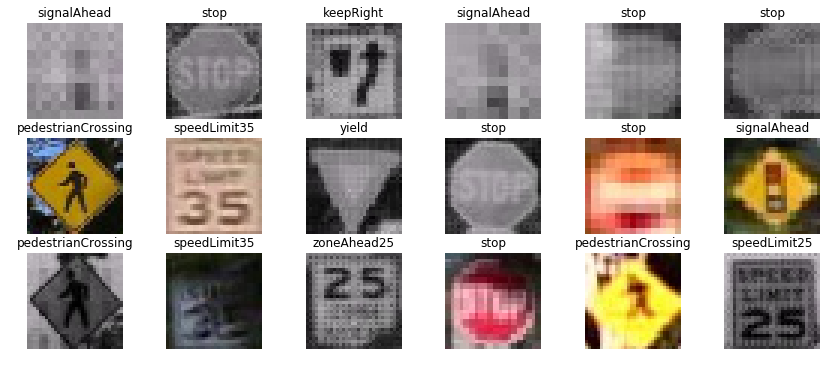

In [51]:
fig, axs = plt.subplots(3,6, figsize=(15,6))
fig.subplots_adjust(hspace = .2, wspace = .001)
axs = axs.ravel()
for i in range(18):
    index = random.randint(0,len(X))
    image = images[index]
    axs[i].axis("off")
    axs[i].imshow(image)
    axs[i].set_title(labels[index])

In [52]:
sign_class = list(set(labels))
class_id = pd.Series(sign_class)
class_id = class_id.to_dict()
class_id = {val:key for (key,val) in class_id.items()}

In [100]:
class_id

{'addedLane': 13,
 'curveLeft': 32,
 'curveRight': 35,
 'dip': 15,
 'doNotEnter': 12,
 'doNotPass': 0,
 'intersection': 38,
 'keepRight': 14,
 'laneEnds': 43,
 'merge': 34,
 'noLeftTurn': 11,
 'noRightTurn': 8,
 'pedestrianCrossing': 31,
 'rampSpeedAdvisory20': 19,
 'rampSpeedAdvisory35': 24,
 'rampSpeedAdvisory40': 23,
 'rampSpeedAdvisory45': 7,
 'rampSpeedAdvisory50': 2,
 'rampSpeedAdvisoryUrdbl': 46,
 'rightLaneMustTurn': 28,
 'roundabout': 3,
 'school': 4,
 'schoolSpeedLimit25': 16,
 'signalAhead': 29,
 'slow': 45,
 'speedLimit15': 1,
 'speedLimit25': 30,
 'speedLimit30': 20,
 'speedLimit35': 18,
 'speedLimit40': 33,
 'speedLimit45': 22,
 'speedLimit50': 42,
 'speedLimit55': 40,
 'speedLimit65': 10,
 'speedLimitUrdbl': 26,
 'stop': 5,
 'stopAhead': 44,
 'thruMergeLeft': 36,
 'thruMergeRight': 39,
 'thruTrafficMergeLeft': 9,
 'truckSpeedLimit55': 41,
 'turnLeft': 25,
 'turnRight': 6,
 'yield': 21,
 'yieldAhead': 27,
 'zoneAhead25': 17,
 'zoneAhead45': 37}

In [53]:
y = np.array(pd.Series(labels).replace(class_id))

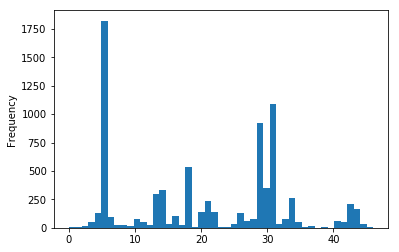

In [54]:
g = pd.Series(y).plot.hist(bins = 47)

In [55]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size = 0.3, random_state = 0,)

In [56]:
def random_scaling(img):   
    rows,cols,_ = img.shape
# transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

In [57]:
print('X, y shapes:', X_train.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 200:
        for i in range(200 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train.shape[0])
            new_img = X_train[class_indices[0][i % n_samples]]
#            new_img = random_scaling(new_img)
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (5498, 32, 32, 3) (5498,)
0 : |----|----|----|----
1 : |----|----|----|----
2 : |----|----|----|---
3 : |----|----|----|-
4 : |----|----|
5 : 
6 : |----|----|---
7 : |----|----|----|--
8 : |----|----|----|--
9 : |----|----|----|---
10 : |----|----|----|
11 : |----|----|----|-
12 : |----|----|----|---
13 : |
14 : 
15 : |----|----|----|--
16 : |----|----|---
17 : |----|----|----|---
18 : 
19 : |----|----|----|----
20 : |----|----
21 : |---
22 : |----|----
23 : |----|----|----|----
24 : |----|----|----|----
25 : |----|----|----|--
26 : |----|----|
27 : |----|----|----|
28 : |----|----|----
29 : 
30 : 
31 : 
32 : |----|----|----|--
33 : |----|----|----
34 : |
35 : |----|----|----|-
36 : |----|----|----|----
37 : |----|----|----|---
38 : |----|----|----|----
39 : |----|----|----|----
40 : |----|----|----|----
41 : |----|----|----|
42 : |----|----|----|--
43 : |----|
44 : |----|---
45 : |----|----|----|--
46 : |----|----|----|----
X, y shapes: (11745, 32, 32, 3) (11745,)


In [58]:
import cv2
def grayscale2(img):
# change picture to grayscale, and adjust brightness
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    dst2 = cv2.equalizeHist(gray)
    return dst2

In [59]:
X_train.shape

(11745, 32, 32, 3)

In [60]:
X_train_gray = []
for i in range(0,len(X_train)):
    grayed_img = grayscale2(X_train[i])
    X_train_gray.append(grayed_img)
X_train_gray = np.array(X_train_gray)

In [61]:
X_test_gray = []
for i in range(0,len(X_test)):
    grayed_img = grayscale2(X_test[i])
    X_test_gray.append(grayed_img)
X_test_gray = np.array(X_test_gray)

In [62]:
X_train_normalized = (X_train_gray.astype(float) - 128)/128 
X_test_normalized = (X_test_gray.astype(float) - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

0.00680568950031
0.00654926065373


In [63]:
X_train_normalized = X_train_normalized[:,:,:,np.newaxis]
X_test_normalized = X_test_normalized[:,:,:,np.newaxis]

In [67]:
X_train_normalized.shape

(11745, 32, 32, 1)

In [68]:
X_test_normalized.shape

(2357, 32, 32, 1)

In [71]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 256

In [72]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # added dropout layer
    fc1  = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 94.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 94), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(94))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # added dropout layer
    fc2  = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 94. Output = 47.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(94, 47), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(47))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [73]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 47)
keep_prob = tf.placeholder(tf.float32)

In [74]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.002

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [75]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [76]:
accu =[]

EPOCHS = 20
BATCH_SIZE = 256

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normalized)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_normalized, y_train = shuffle(X_train_normalized, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_normalized[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_test_normalized, y_test)
        accu.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.696

EPOCH 2 ...
Validation Accuracy = 0.874

EPOCH 3 ...
Validation Accuracy = 0.937

EPOCH 4 ...
Validation Accuracy = 0.947

EPOCH 5 ...
Validation Accuracy = 0.960

EPOCH 6 ...
Validation Accuracy = 0.960

EPOCH 7 ...
Validation Accuracy = 0.969

EPOCH 8 ...
Validation Accuracy = 0.972

EPOCH 9 ...
Validation Accuracy = 0.969

EPOCH 10 ...
Validation Accuracy = 0.977

EPOCH 11 ...
Validation Accuracy = 0.974

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.977

EPOCH 14 ...
Validation Accuracy = 0.975

EPOCH 15 ...
Validation Accuracy = 0.976

EPOCH 16 ...
Validation Accuracy = 0.978

EPOCH 17 ...
Validation Accuracy = 0.977

EPOCH 18 ...
Validation Accuracy = 0.975

EPOCH 19 ...
Validation Accuracy = 0.980

EPOCH 20 ...
Validation Accuracy = 0.979

Model saved


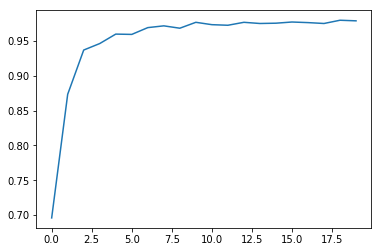

In [77]:
plt.plot(accu)

In [78]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.979


In [112]:
list_of_images = []
list_of_images = glob.glob('./downloaded_traffic_signs/*.jpg')
X_test_fromWeb = []
dim = (32,32)
for i in list_of_images:
    img_ = cv2.imread(i)
    img_resize = cv2.resize(img_, dim, interpolation = cv2.INTER_AREA)
    X_test_fromWeb.append(img_resize)
X_test_fromWeb = np.array(X_test_fromWeb)

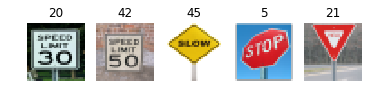

In [113]:
#give classification answer
y_test_fromWeb = [20,42,45,5,21]
fig, axs = plt.subplots(1,5, figsize=(6, 6))
for i in range(5):
    image = X_test_fromWeb[i]
    axs[i].axis('off')
    axs[i].imshow((cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
    axs[i].set_title(y_test_fromWeb[i])

In [114]:
X_test_fromWeb_gray = []
for i in range(0,len(X_test_fromWeb)):
    grayed_img = grayscale2(X_test_fromWeb[i])
    X_test_fromWeb_gray.append(grayed_img)

X_test_fromWeb_gray = np.array(X_test_fromWeb_gray)
X_test_fromWeb_gray = X_test_fromWeb_gray[:,:,:,np.newaxis]
X_test_fromWeb_normal = X_test_fromWeb_gray  / 128 - 1

In [115]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_fromWeb_normal, y_test_fromWeb)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.000


In [116]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    softmax_logits_for_web = sess.run(softmax_logits, feed_dict={x: X_test_fromWeb_normal, keep_prob: 1.0})
    top_k_for_web = sess.run(top_k, feed_dict={x: X_test_fromWeb_normal, keep_prob: 1.0})
    

0  picture class predictions are [16 30 45 41 26]
answer is 20
1  picture class predictions are [30  2 18 20 16]
answer is 42
2  picture class predictions are [14 28  1 17 15]
answer is 45
3  picture class predictions are [21  3 23  7  4]
answer is 5
4  picture class predictions are [13 31  8  4 43]
answer is 21


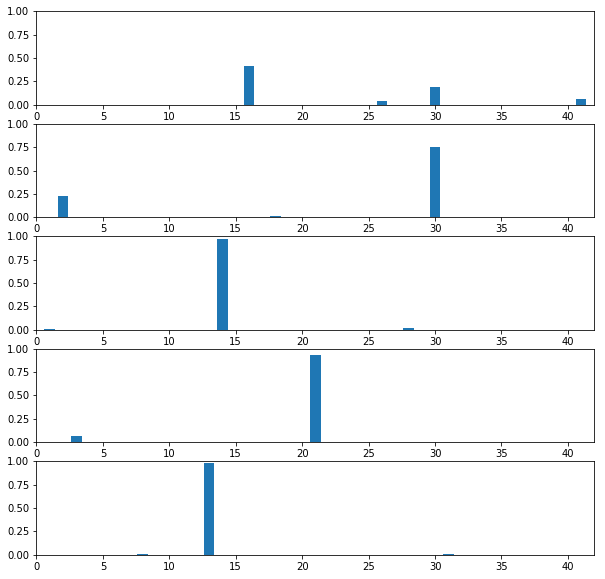

In [117]:
fig, axs = plt.subplots(5,1, figsize=(10, 10))
for i in range(5):
    
    axs[i].bar(top_k_for_web[1][i],top_k_for_web[0][i])
    axs[i].set_xlim(0,42)
    axs[i].set_ylim(0,1)
    print(i, " picture class predictions are", top_k_for_web[1][i])
    print("answer is", y_test_fromWeb[i])

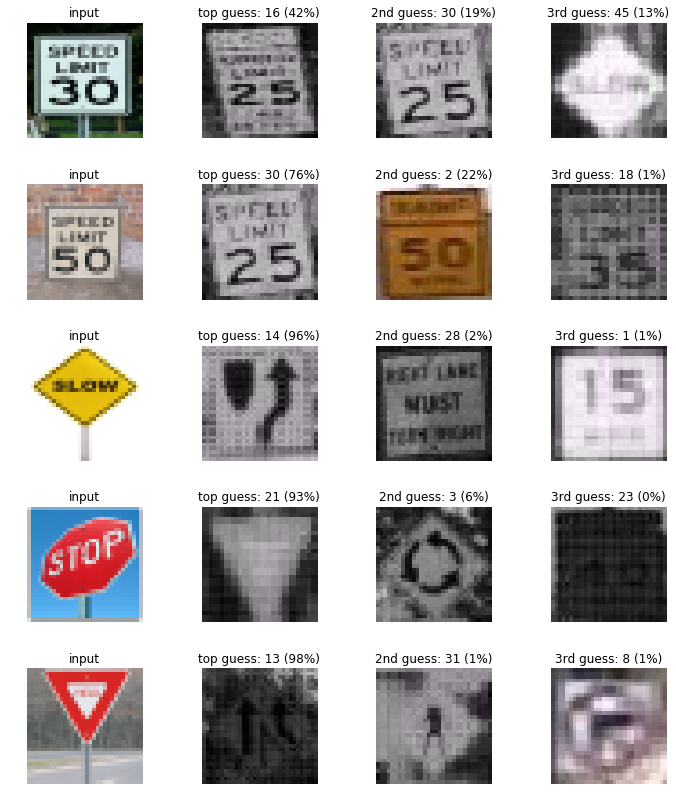

In [120]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_test_fromWeb_normal, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: X_test_fromWeb_normal, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(X_test_fromWeb):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_test == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_test[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_test == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_test[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_test == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_test[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))